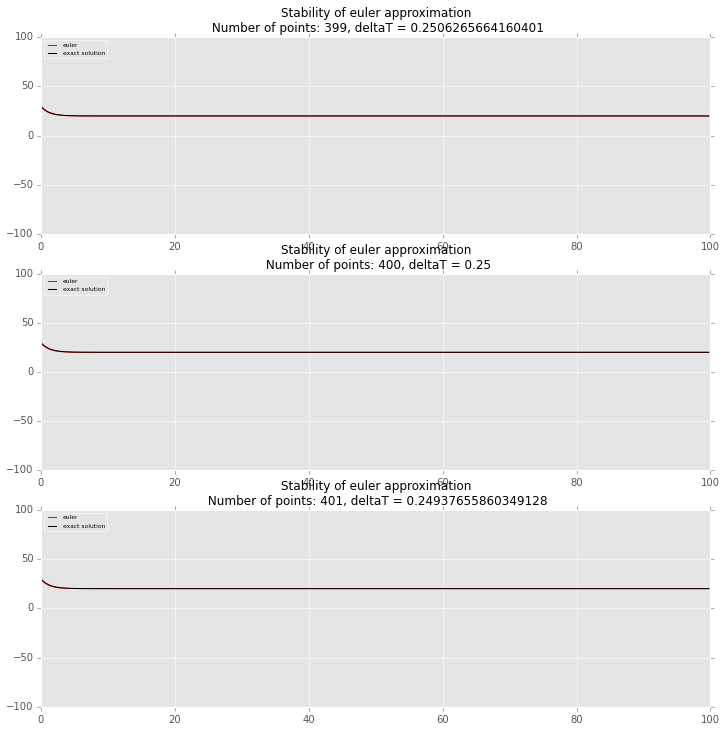

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numlabs.lab2.lab2_functions import euler,beuler,leapfrog
import numpy as np
plt.style.use('ggplot')

To = 30 
Ta = 20

theFuncs={'euler':euler,'leapfrog':leapfrog,'beuler':beuler}


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this is silly but oh well
    
for i in range(1,4):
  
    ax = fig.add_subplot(3,1,i)
    if i == 1:
        funChoice = 'euler'
        npts = 399
        color = 'r'
    elif i == 2:
        funChoice = 'euler'
        npts = 400
        color = 'r'
    elif i == 3:
        funChoice = 'euler'
        npts = 401
        color = 'r'    
        
    tend = 100    
    deltaT = tend /npts
    
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    ax.set_xlim([0,tend])
    ax.set_ylim([-100,100])
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    exactTime=np.empty([npts,],np.float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
        exactTime[i] = tend*i/npts
        exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    ax.plot(exactTime,exactTemp,'k', label = "exact solution")
    
    titl = "Stability of " + funChoice +" approximation \n Number of points: " + str(npts) + ", deltaT = " + str(deltaT)
    ax.set_title(titl, fontsize = 12)
    ax.legend(loc=2,prop={'size':6})
    